In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,confusion_matrix
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
total_records = df.shape[0]

# Atau menggunakan fungsi len
total_records = len(df)

print(f"Total record dalam dataset: {total_records}")

Total record dalam dataset: 768


In [8]:
df = df.dropna(subset=['gender'])

KeyError: ['gender']

In [ ]:
gender_mapping = {'Female': 0, 'Male': 1}

# Menggunakan method map() untuk mengganti nilai teks dengan nilai numerik
df['gender'] = df['gender'].map(gender_mapping)

# Menggantikan nilai NaN dengan nilai default (misalnya, -1) atau nilai lain yang sesuai
df['gender'] = df['gender'].fillna(1)

# Mengubah tipe data kolom 'gender' menjadi integer
df['gender'] = df['gender'].astype(int)

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df['bmi'] = df['bmi'].astype(int)
df['HbA1c_level'] = df['HbA1c_level'].astype(int)
df['age'] = df['age'].astype(int)

KeyError: 'bmi'

In [11]:
df['smoking_history'].value_counts()

KeyError: 'smoking_history'

In [ ]:
df=df.replace({'smoking_history':{'current':1,'never':0,'No Info':2,'former':3,'not current':4,'ever':5}})
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25,6,140,0
1,0,54,0,0,2,27,6,80,0
2,1,28,0,0,0,27,5,158,0
3,0,36,0,0,1,23,5,155,0
4,1,76,1,1,1,20,4,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,2,27,6,90,0
99996,0,2,0,0,2,17,6,100,0
99997,1,66,0,0,3,27,5,155,0
99998,0,24,0,0,0,35,4,100,0


In [3]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

Model_CNN FIXX

In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import tensorflow as tf 
import pandas as pd

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Neural Network
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model_nn.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
y_pred_prob = model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)





y_pred_binary = (y_pred > 0.5).astype(int)
# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: {}".format(f1))



# Pastikan y_test dan y_pred adalah array satu dimensi
y_test_single_dim = y_test.ravel()
y_pred_single_dim = y_pred_binary.ravel()
# Menampilkan classification report
print(classification_report(y_test_single_dim, y_pred_single_dim))

Epoch 1/50
10/10 [==============================] - 1s 33ms/step - loss: 0.6670 - accuracy: 0.6173 - val_loss: 0.6146 - val_accuracy: 0.7143
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6272 - accuracy: 0.6710 - val_loss: 0.5740 - val_accuracy: 0.7338
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5618 - accuracy: 0.7134 - val_loss: 0.5487 - val_accuracy: 0.7273
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.5331 - accuracy: 0.7101 - val_loss: 0.5317 - val_accuracy: 0.7273
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5183 - accuracy: 0.7427 - val_loss: 0.5217 - val_accuracy: 0.7338
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5104 - accuracy: 0.7492 - val_loss: 0.5170 - val_accuracy: 0.7468
Epoch 7/50
10/10 [==============================] - 0s 12ms/step - loss: 0.5004 - accuracy: 0.7687 - val_loss: 0.5137 - val_accuracy: 0.7662
Epoch 8/50
10/10 [

In [5]:
"""import json

# Asumsikan Anda memiliki instance model 'model_ann'

# Serialize arsitektur model ke dalam format JSON
model_json = model_nn.to_json()

# Simpan arsitektur model ke dalam file
with open('model_DNN.json', 'w') as outfile:
    outfile.write(model_json)

""# Serialize bobot model ke dalam format JSON
model_weights = model_nn.get_weights()
weights_json = [weight.tolist() for weight in model_weights]

# Simpan bobot model ke dalam file
with open('weights_DNN.json', 'w') as outfile:
    json.dump(weights_json, outfile)"""
    
from tensorflow.keras.models import load_model

# Simpan model ke dalam file H5
model_nn.save('model_DNN.h5')

print("Arsitektur model dan bobot berhasil disimpan ke file JSON")

Arsitektur model dan bobot berhasil disimpan ke file JSON


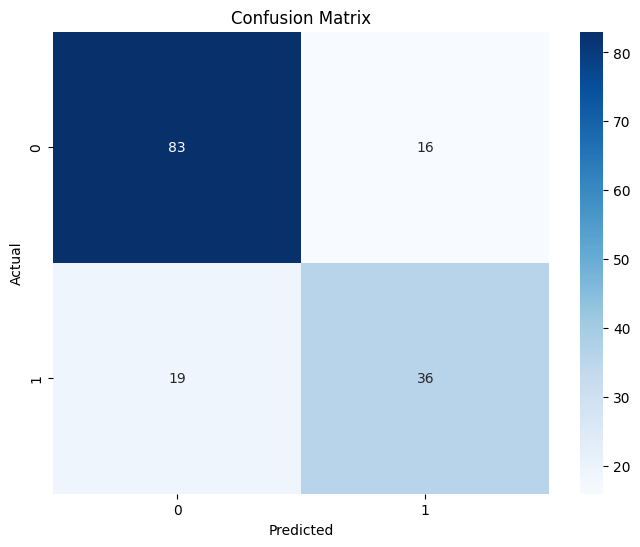

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

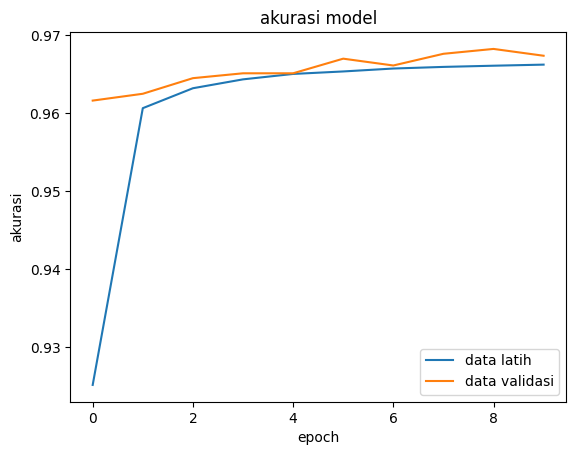

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('akurasi model')
plt.ylabel('akurasi')
plt.xlabel('epoch')

plt.legend(['data latih','data validasi'],loc='lower right')